In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats

# Perform descriptive analytics to create a customer profile for each CardioGood Fitness treadmill product line

In [2]:
path = r"C:\Users\hp\Downloads\datasets_375151_728976_CardioGoodFitness.csv"

In [3]:
df = pd.read_csv(path)
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [4]:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [5]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


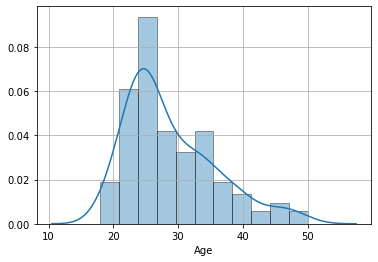

In [6]:
sns.distplot(df['Age'],hist_kws=dict(edgecolor = 'black'))
plt.grid(True)

Text(0.5, 1.0, 'MALE AGE')

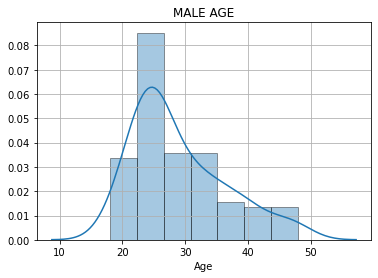

In [7]:
sns.distplot(df[df['Gender']== 'Male']['Age'],hist_kws=dict(edgecolor = 'black'))
plt.grid(True)
plt.title('MALE AGE')

Text(0.5, 1.0, 'FEMALE AGE')

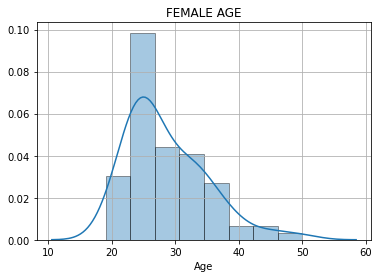

In [8]:
sns.distplot(df[df['Gender']== 'Female']['Age'],hist_kws=dict(edgecolor = 'black'))
plt.grid(True)
plt.title('FEMALE AGE')

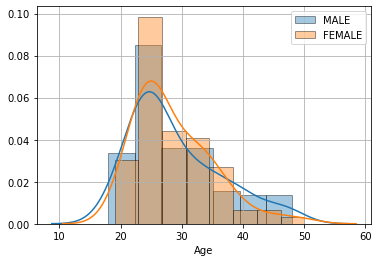

In [9]:
sns.distplot(df[df['Gender']== 'Male']['Age'],hist_kws=dict(edgecolor = 'black',label = 'MALE'))

sns.distplot(df[df['Gender']== 'Female']['Age'],hist_kws=dict(edgecolor = 'black',label = 'FEMALE'))

plt.legend()
plt.grid(True)


* distribution of ages is almost equal among Gender

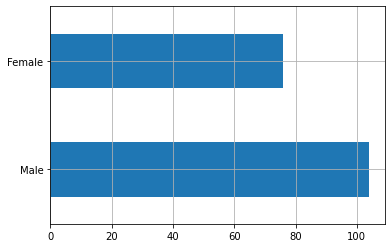

In [10]:
df['Gender'].value_counts().plot(kind='barh')
plt.grid(True)

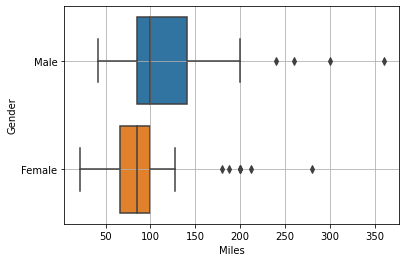

In [11]:
sns.boxplot(x = df['Miles'], y= df['Gender'])
plt.grid(True)

* On average males run more miles than female

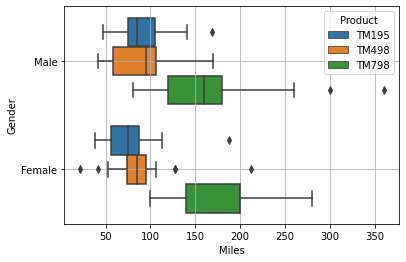

In [12]:
sns.boxplot(x = df['Miles'], y= df['Gender'],hue=df['Product'])
plt.grid(True)

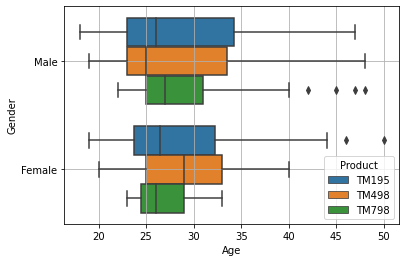

In [13]:
sns.boxplot(x = df['Age'], y= df['Gender'],hue=df['Product'])
plt.grid(True)

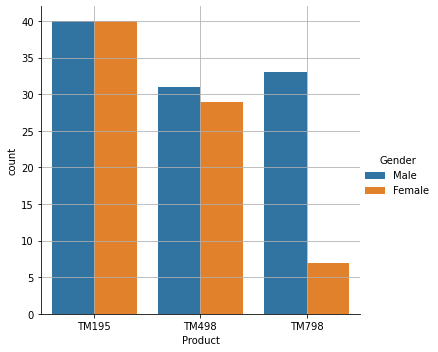

In [14]:
sns.catplot(kind='count',x = 'Product' ,hue='Gender' ,data=df)
plt.grid(True)

The three plots shown above tells us a lot about the products.
* TM195 & TM498 are frequently purchased by male and female

* The boxplots tells us that TM798 is purchased by young people and their miles per week is higher than the other two products, maybe it is used by athletes and we can check this assumption by looking at the fitness level of this group.

* Although TM798 is purchased more by male than female



In [15]:
# let's look at the fitness of the people who purchase TM798
df[(df['Product'] == 'TM798') & (df['Gender']== 'Male')]['Fitness'].value_counts()

5    24
4     6
3     3
Name: Fitness, dtype: int64

In [16]:
df[(df['Product'] == 'TM798') & (df['Gender']== 'Female')]['Fitness'].value_counts()

5    5
4    1
3    1
Name: Fitness, dtype: int64

YES! , our assumption was right. Most of the people who use TM798 rate themselves a 5 star in fitness.

Text(0.5, 1.0, 'Male')

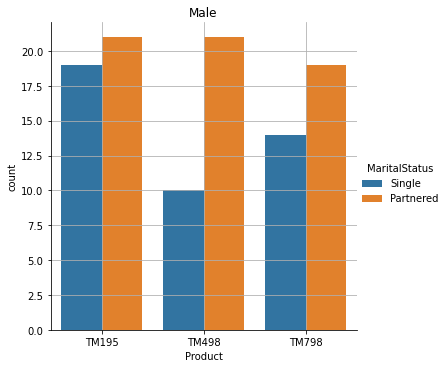

In [17]:
# let's focus on the Marital status and see what new we can find out

sns.catplot(kind='count',x = 'Product' ,hue='MaritalStatus',data=df[df['Gender'] == 'Male'])
plt.grid(True)
plt.title('Male')


Text(0.5, 1.0, 'Female')

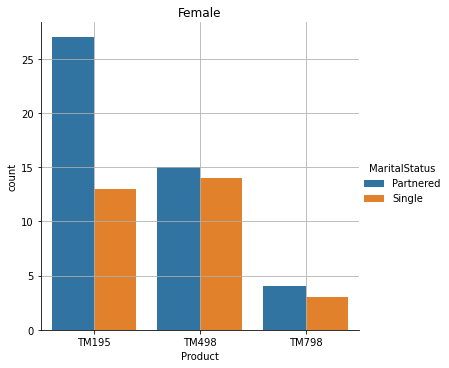

In [18]:
sns.catplot(kind='count',x = 'Product' ,hue='MaritalStatus' ,data=df[df['Gender'] == 'Female'])
plt.grid(True)
plt.title('Female')

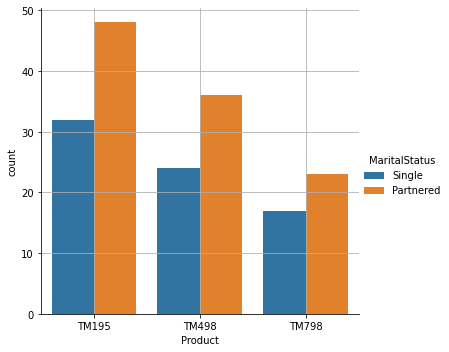

In [19]:
sns.catplot(kind='count',x = 'Product' ,hue='MaritalStatus' ,data=df)
plt.grid(True)

* most of the people are parents 

In [20]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [21]:
 product_grp= df.groupby(['Product','Gender'])

In [22]:
product_grp[['Usage','Fitness','Miles']].mean()

Usage   Fitness       Miles
Product Gender                                
TM195   Female  2.900000  2.875000   76.200000
        Male    3.275000  3.050000   89.375000
TM498   Female  3.137931  2.862069   87.344828
        Male    3.000000  2.935484   88.483871
TM798   Female  5.000000  4.571429  180.000000
        Male    4.727273  4.636364  164.121212

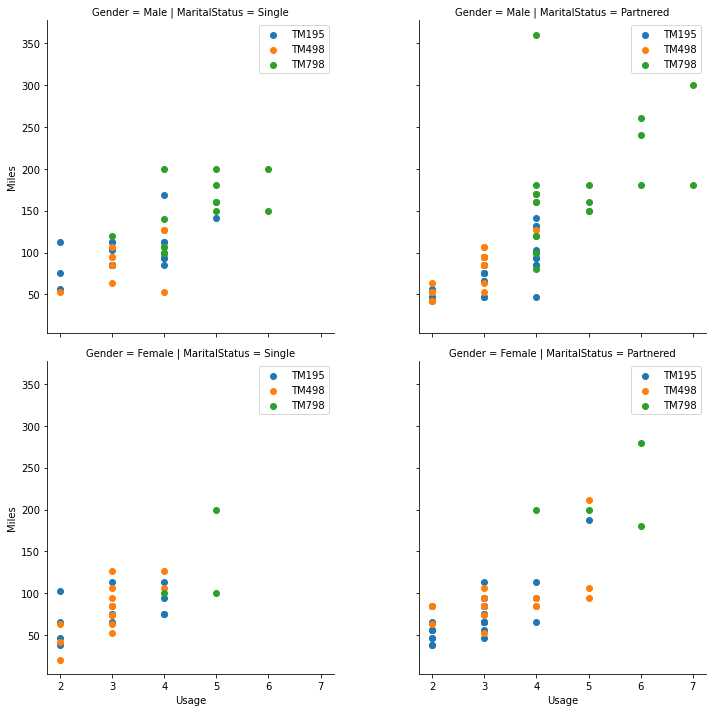

In [23]:

g = sns.FacetGrid(df,row= 'Gender',col='MaritalStatus',hue='Product',legend_out=True,height=5)
g= g.map(plt.scatter,'Usage','Miles')
plt.subplots_adjust(wspace=0.3)
for ax in g.axes.ravel():
    ax.legend()

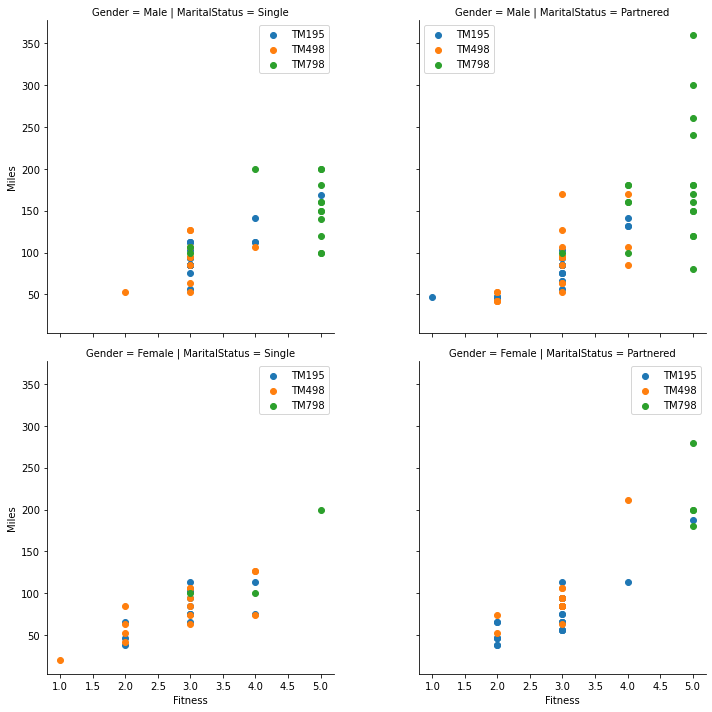

In [24]:
g = sns.FacetGrid(df,row= 'Gender',col='MaritalStatus',hue='Product',legend_out=True,height=5)
g= g.map(plt.scatter,'Fitness','Miles')
plt.subplots_adjust(wspace=0.3)
for ax in g.axes.ravel():
    ax.legend()

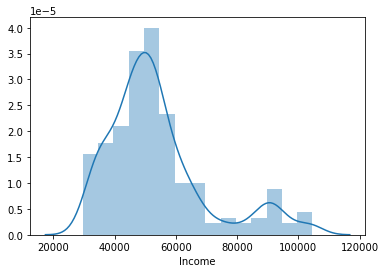

In [25]:
sns.distplot(df['Income'])

In [26]:
df['Age'].describe()

count    180.000000
mean      28.788889
std        6.943498
min       18.000000
25%       24.000000
50%       26.000000
75%       33.000000
max       50.000000
Name: Age, dtype: float64

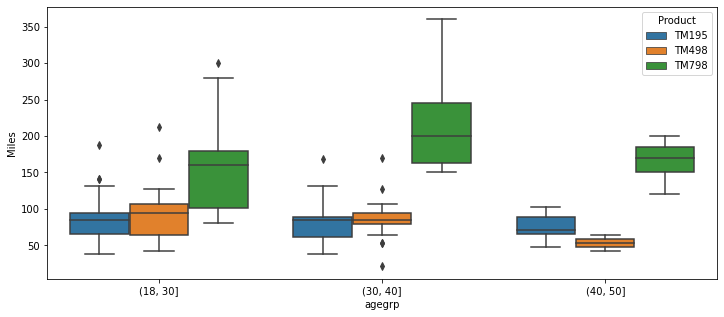

In [27]:
df['agegrp']= pd.cut(df['Age'],[18,30,40,50])
plt.figure(figsize=(12,5))
sns.boxplot(x='agegrp',y='Miles',hue='Product',data=df)

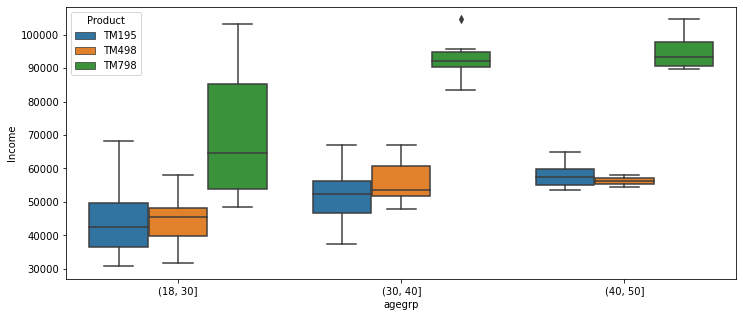

In [28]:
df['agegrp']= pd.cut(df['Age'],[18,30,40,50])
plt.figure(figsize=(12,5))
sns.boxplot(x='agegrp',y='Income',hue='Product',data=df)

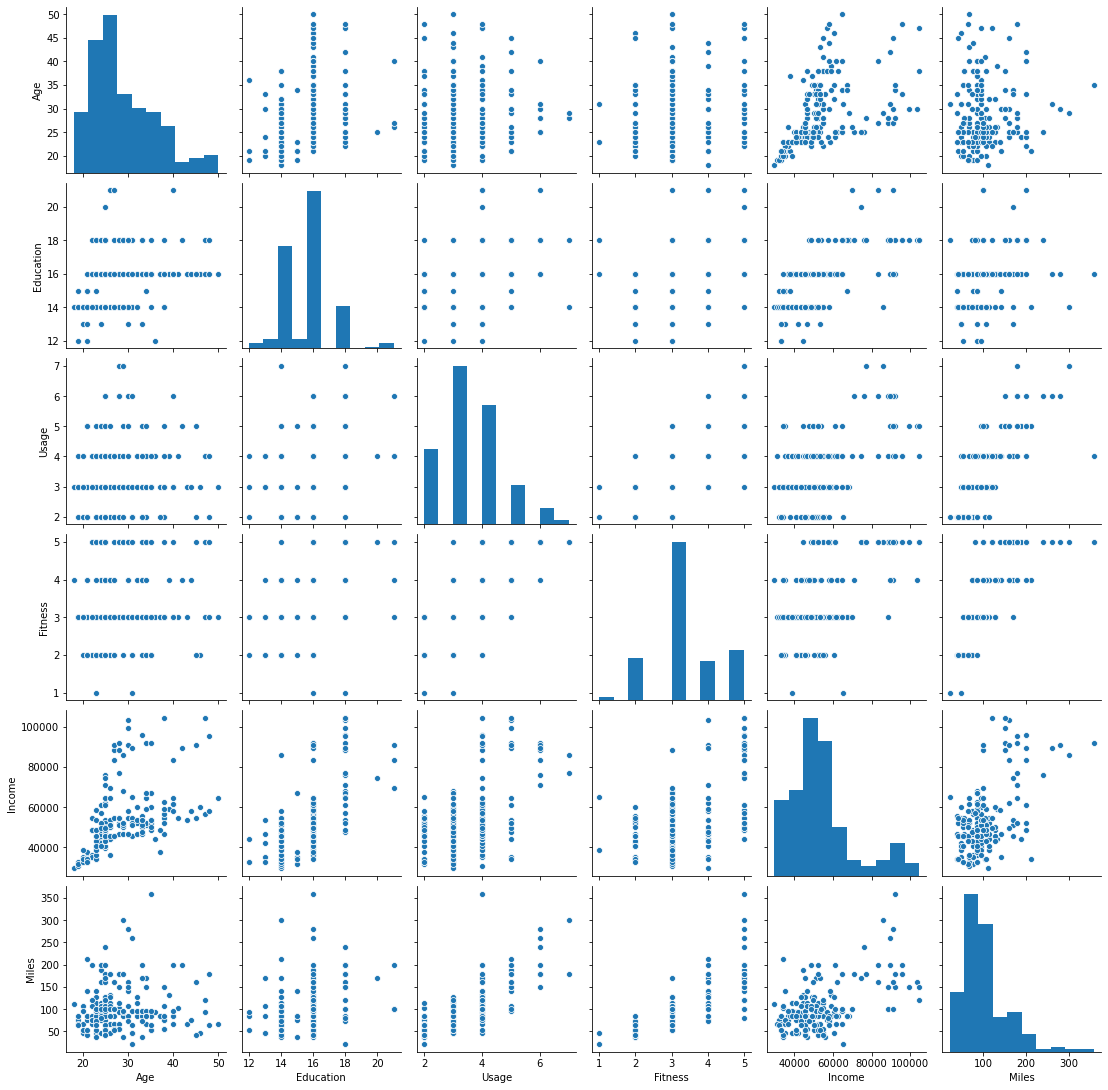

In [29]:
sns.pairplot(df)

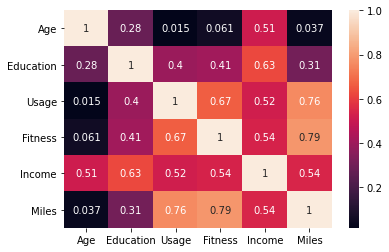

In [33]:
corr = df.corr()
sns.heatmap(corr,annot=True)

In [34]:
x= df[['Fitness','Usage']]
y = df['Miles']

In [35]:
x1 = sm.add_constant(x)
result = sm.OLS(y,x1).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Miles   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     223.3
Date:                Sat, 11 Jul 2020   Prob (F-statistic):           3.92e-49
Time:                        13:47:35   Log-Likelihood:                -852.31
No. Observations:                 180   AIC:                             1711.
Df Residuals:                     177   BIC:                             1720.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -56.7429      7.856     -7.223      0.000     -72.246     -41.240
Fitness       27.2065      2.913      9.341      0.000      21.459      32.954
Usage         20.2149      2.575      7.852      0.000      15.134      25.296
==============================================================================
Omnibus:                      121.299   Durbin-Watson:                   1.838
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1799.061
Skew:                           2.205   Prob(JB):                         0.00
Kurtosis:                      17.847   Cond. No.                         19.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""